> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The Movies Database (TMDb) dataset, this dataset is originally from Kaggle was provided by Udacity. The dataset contains information about 10,000 movies form 1960 to 2015 collected from The Movie Database (TMDb), including user ratings and revenue. The questions that I will explore over the course of the report:

• Q1 : What kind of properties are associated with movies that have high profit?

   •   High profit movies average budget, average revenue and average popularity ?     
   •   In which month and year the movies makes the most profit ?     
   •   High profit movies genre, casts, directors and production companies ?

• Q2 : What kind of properties are associated with movies that have high ratings?

   •   High Ratings movies average budget, average revenue, and average popularity ?
   •   High Ratings movies genre, casts, directors and production companies ?

In [2]:
# Import python packages i plan to use.

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

## General Properties
Below are the questions to answer using pandas to explore tmdb-movies.csv and have a holistic understanding of the data set:
• Number of samples & columns in the dataset (shape of data).
• Datatypes of the columns .
• Descriptive statistics for the dataset .
• Features with missing values .
• Duplicate rows in the dataset .
• Number of unique values for the dataset .
• Number of rows with missing values in the dataset .
• Number of zero values in runtime, budget_adj and revenue_adj.

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


TypeError: __init__() got an unexpected keyword argument 'max_rows'

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

Number of rows & columns in the dataset
Based on the cell below, there are a totel of 10,866 number of moives and 21 columns in the dataset.

In [5]:
df.shape


(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Number of missing values in the dataset
There are number of columns which have null values according to the resualt below : imdb_id , cast,homepage , director , tagline , keywords,overview ,genres, production_companies. Some of columns have a huge number of missing values such as : homepage ,tagline , keywords, production_companies but most of them i will drop since they not necessary for our questions.

In [8]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [11]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [12]:
df.isnull().any(axis=1).sum()

8874

In [13]:
col_with_zero = ['runtime','budget_adj','revenue_adj']
for i in col_with_zero:
    zero_count = (df[i] == 0).sum()
    print('`{}` have {} zero values'.format(i,zero_count))

`runtime` have 31 zero values
`budget_adj` have 5696 zero values
`revenue_adj` have 6016 zero values


Observations:

There are 5696 zero values rows in budget_adj, 6016 zero values row in revenue_adj It is a huge amount of missing data for these two columnes. In order not to drop more than 50% of the data that will affect my statistics and visualization result, I decided to retain these rows and replace them with mean values.
Data Cleaning
After the discussion on the structure of the dataset and the problems that need to be cleaned, the following are the cleaning steps :

Drop unimportant columns.
Drop duplicates rows.
Replace zero values with NaN.
Replace NaN values with mean.
Add new column profit.
Convert release_date column to Date datatype.
Drop Uniportant Columns
Drop columns that aren't related to our questions. Coulmns i will drop : id, imdb_id, homepage, tagline, keywords,overview, vote_count.
budget and revenue will also be drop as I will be using the final two columns ending with “_adj” which show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [14]:

# # drop columns from dataset.
df.drop(['id','imdb_id','homepage','tagline','keywords','overview'
         ,'budget','revenue','vote_count'],axis = 1,inplace = True)

# showe the resualt.
df.head(3)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015,1.012000e+08,2.716190e+08


In [15]:
# drop duplicate rows
df.drop_duplicates(inplace=True)
# check number of duplicates -it should be 0
df.duplicated().sum()

0

In [16]:
# creeate a list columns with zero values.
col_with_zero = ['runtime','budget_adj','revenue_adj']

# replace zero values with NaN for columns in the list.
df[col_with_zero] = df[col_with_zero].replace(0,np.NAN)

# confirme the changes
df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10834.000000,10865.000000,10865.000000,5.169000e+03,4.849000e+03
mean,0.646446,102.363855,5.975012,2001.321859,3.688907e+07,1.151009e+08
std,1.000231,30.948225,0.935138,12.813260,4.196096e+07,1.988557e+08
min,0.000065,2.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207575,90.000000,5.400000,1995.000000,8.102293e+06,1.046585e+07
50%,0.383831,99.000000,6.000000,2006.000000,2.271505e+07,4.395666e+07
75%,0.713857,112.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [17]:
# fill NaN values with mean
df['runtime'].fillna(df['runtime'].mean(),inplace = True)
df['budget_adj'].fillna(df['budget_adj'].mean(),inplace = True)
df['revenue_adj'].fillna(df['revenue_adj'].mean(),inplace = True)

In [18]:
# adding new column profit calculated using revenue minus budget 
df['profit'] = df['revenue_adj'] - df['budget_adj']

In [19]:
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


In [20]:
# convert release_data to datetime formate
df['release_date']=pd.to_datetime(df['release_date'])
# confirm changes
df.dtypes

popularity                     float64
original_title                  object
cast                            object
director                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
profit                         float64
dtype: object

In [21]:
# save cleaned data for next steps 
df.to_csv('tmdb_cleaned_data.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section.

Explore Relations Between Values
From the plots blewo can see the relation between all values, important correlation we need the relation between profit and other values to know which values have the most impact on profit.



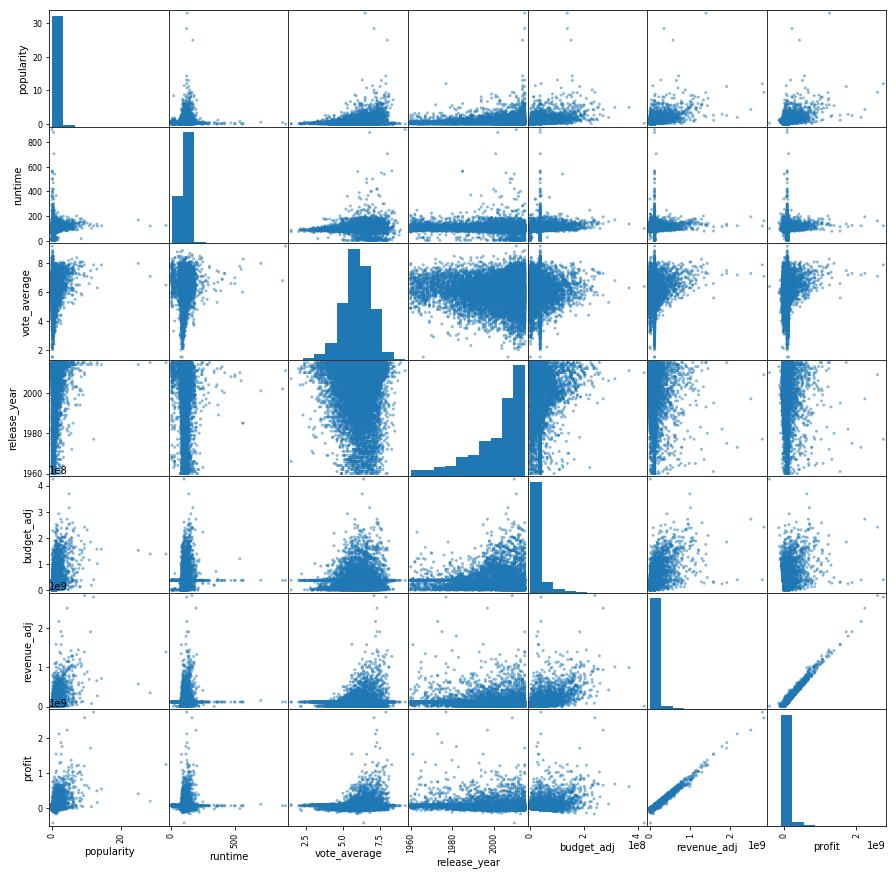

In [22]:
pd.plotting.scatter_matrix(df,figsize=(15,15));


In [23]:
df['profit'].corr(df['popularity'])

0.466412128484597

In [24]:
df['profit'].corr(df['runtime'])

0.09300083212732443

In [25]:
df['profit'].corr(df['vote_average'])

0.13516106306518366

In [26]:
df['profit'].corr(df['budget_adj'])

0.3388521579432795

Q1 : What kind of properties are associated with movies that have high profit?
In order to analyze on the properties that are associated with movies that have high profit, I will filter the dataset to movies that made profit of more than or equal 100 Million dollars.

In [27]:
# create new dataframe by filter to movies that made profit of more than 100Million dollars 
high_profit_movie = df.query('profit >= 100000000')

high_profit_movie.head(3)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08


In [28]:
high_profit_movie.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj,profit
count,1966.000000,1966.000000,1966.000000,1966.000000,1.966000e+03,1.966000e+03,1.966000e+03
mean,1.311286,106.840840,6.064547,2000.417599,4.258442e+07,2.571771e+08,2.145927e+08
std,1.893561,27.150187,0.991798,13.446381,5.369029e+07,2.512465e+08,2.210780e+08
min,0.001349,4.000000,1.500000,1960.000000,9.210911e-01,1.044501e+08,1.000062e+08
25%,0.312213,92.000000,5.500000,1993.000000,4.605455e+06,1.151009e+08,1.103522e+08
50%,0.699468,102.000000,6.200000,2005.000000,1.454714e+07,1.463675e+08,1.151008e+08
75%,1.648468,119.000000,6.800000,2011.000000,6.573888e+07,3.024097e+08,2.227778e+08
max,32.985763,705.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09


From 10,865 movies, we are now down with only 1,966 movies which have profit of at least 100 Million dollars. The highest earning movie is 2.75 Billion dollars.

In [29]:
# detailes of highest profit movie
highest = high_profit_movie['profit'].idxmax()
highest_details = pd.DataFrame(high_profit_movie.loc[highest])
highest_details

,1329
popularity,12.0379
original_title,Star Wars
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director,George Lucas
runtime,121
genres,Adventure|Action|Science Fiction
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation
release_date,1977-03-20 00:00:00
vote_average,7.9
release_year,1977


From resualt above Star Wars movie have the highest profit by 2.75 Billion dollars.

High profit movie average popularity?

In [30]:
# the average popularity of the movies
high_profit_movie['popularity'].mean()

1.3112857065106815

Based on the above, the average popularity for high profit movies is 1.311 million. Let's use visualization to see the distribution of the popularity.

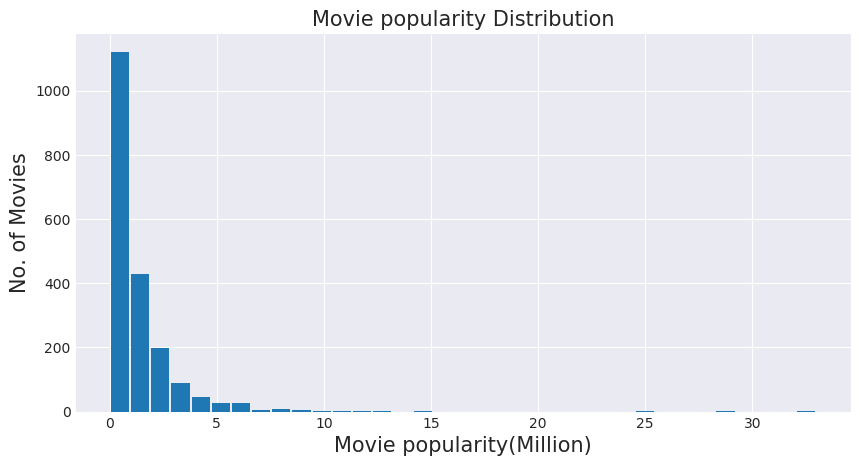

In [31]:
# create histogram to see the distribution of the popularity 
plt.figure(figsize=(10,5), dpi = 100)
sns.set_style('darkgrid')
# x-axis 
plt.xlabel('Movie popularity(Million)', fontsize = 15)
# y-axis 
plt.ylabel('No. of Movies', fontsize=15)
# distribution title
plt.title('Movie popularity Distribution', fontsize=15)

# Plot the histogram
plt.hist(high_profit_movie['popularity'], rwidth = 0.9, bins =35)
# Displays the plot
plt.show()

High profit movies average budget?

In [32]:
# the average budget of the movies
high_profit_movie['budget_adj'].mean()

42584424.20996536

Based on the above, the average budget for high revenue movies is around 42 Million dollars ($42,584,424).

High profit movies average revenue?

In [33]:
# the average revenue of the movies
high_profit_movie['revenue_adj'].mean()

257177114.7523714

Based on the above, the average revenue for high revenue movies is around 257 Million dollars. ($257,177,144).

Which year that makes the highest profit ?

In [34]:
# release year have highest profit
highest_profit_year = high_profit_movie.groupby('release_year')['profit'].sum()
highest_profit_year.idxmax()

2013

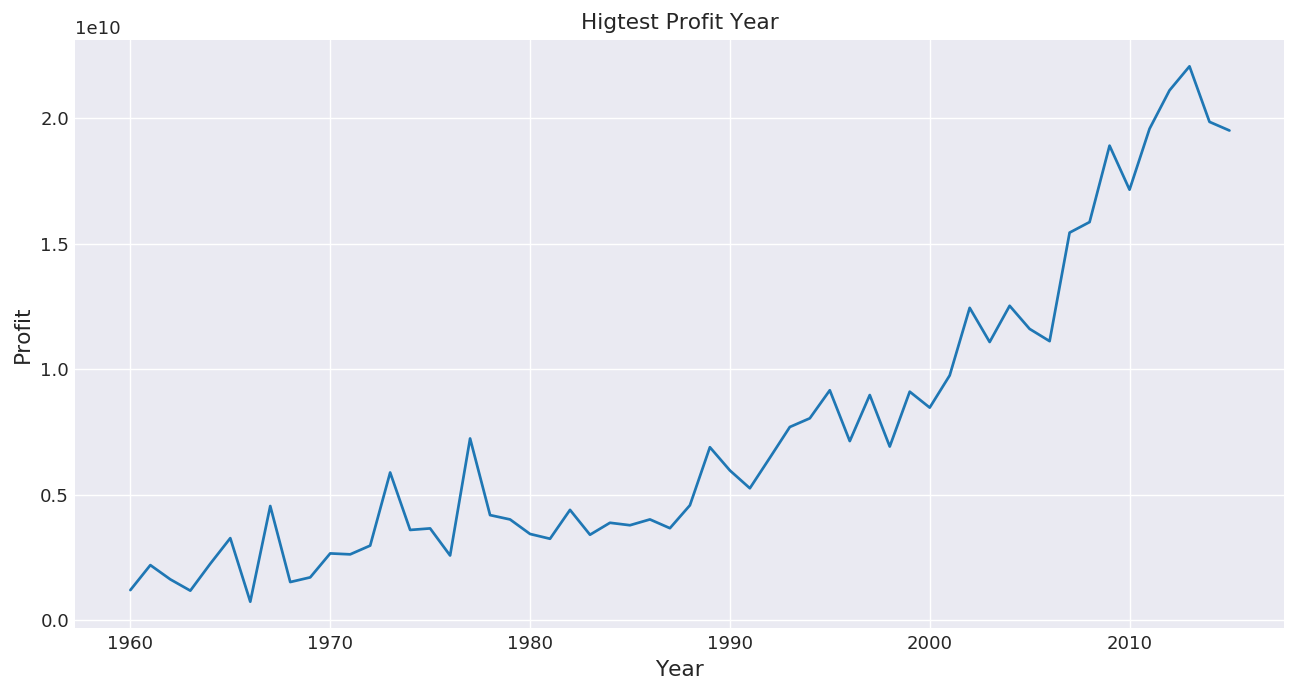

In [35]:
# Figure size
plt.figure(figsize=(12,6), dpi = 130)
sns.set_style('darkgrid')
# x-axis
plt.xlabel('Year', fontsize = 12)
# y-axis
plt.ylabel('Profit', fontsize = 12)
# Title
plt.title('Higtest Profit Year')

# Plot line Chart
plt.plot(highest_profit_year)

# Display the line Chart
plt.show()

Based on the above, we can see that the movies makes the highest profits in year 2013.

In [36]:
# create a new column month by extracting the month from the release date
high_profit_movie['month'] = high_profit_movie['release_date'].apply(lambda x: x.month)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
# total of profits group by month 
highest_profit_month = high_profit_movie.groupby('month')['profit'].sum()
# count of high profit movies group by month
high_profit_movie_month = high_profit_movie.groupby('month')['profit'].count()

highest_profit_month

month
1     1.857157e+10
2     1.539022e+10
3     2.970656e+10
4     2.495908e+10
5     4.971720e+10
6     6.006095e+10
7     4.182675e+10
8     2.171825e+10
9     2.640752e+10
10    3.158647e+10
11    4.250719e+10
12    5.943746e+10
Name: profit, dtype: float64

In [38]:
high_profit_movie_month

month
1     125
2     103
3     137
4     133
5     197
6     218
7     170
8     132
9     177
10    182
11    161
12    231
Name: profit, dtype: int64

In [39]:
# get the month with the highest movies profit
highest_profit_month.idxmax()

6

In [40]:
# get the month with largest count of high profit movies
high_profit_movie_month.idxmax()

12

Based on the above two results, we found that the month with most count of high profit movies is December followed by June but June is the month with the highest profit followed by December which means the number of high profit movies in June has achieved higher profits than the number of high profit movies in December.

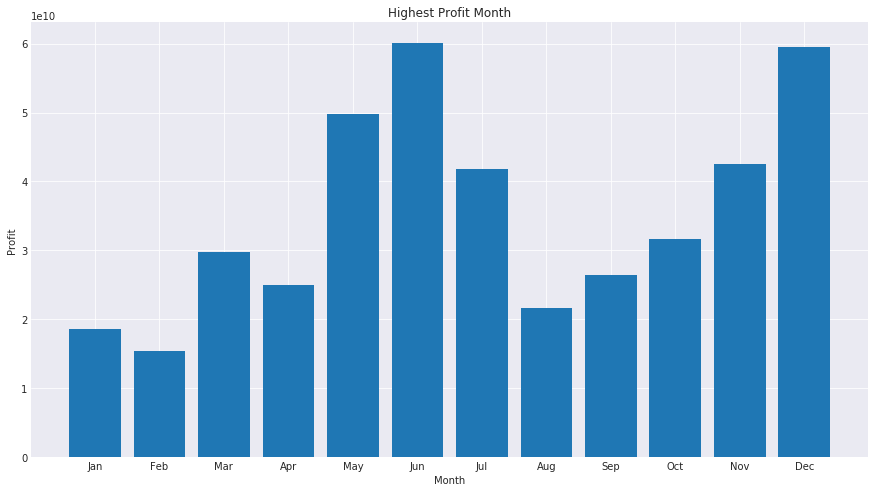

In [41]:
# Figure size
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')

month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], highest_profit_month, tick_label = month_name)
# Title
plt.title('Highest Profit Month')
# y-axis
plt.ylabel('Profit')
# x-axis
plt.xlabel('Month');

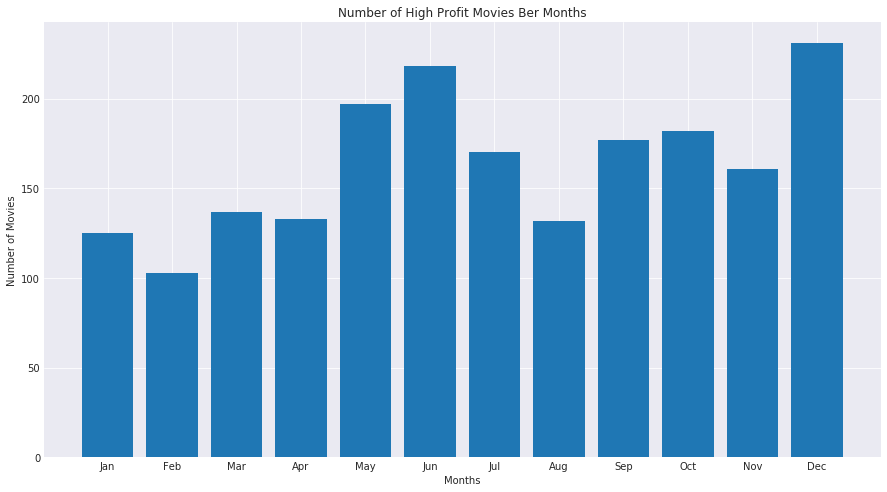

In [42]:
# Figure size
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')

month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], high_profit_movie_month, tick_label = month_name)
# Title
plt.title('Number of High Profit Movies Ber Months')
# y-axis
plt.ylabel('Number of Movies')
# x-axis
plt.xlabel('Months');

High Profit Movies Casts ??

In [43]:
def extract_high_proft_data(column):

    data = high_profit_movie[column].str.cat(sep = '|')
    
    # create pandas series and store the values separately
    data = pd.Series(data.split('|'))
    
    # display value count in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [44]:
# get top 10 casts
cast = extract_high_proft_data('cast')
cast.head(15)

Tom Cruise            27
Tom Hanks             22
Samuel L. Jackson     21
Bruce Willis          20
Sylvester Stallone    20
Brad Pitt             18
Adam Sandler          17
Eddie Murphy          17
Robert De Niro        17
Cameron Diaz          17
Harrison Ford         17
Jim Carrey            16
Ving Rhames           15
Mel Gibson            15
Gary Oldman           15
dtype: int64

The top two male actors with more than 20 movies are Tom Cruise (27 movies) and Tom Hanks (22 movies). As for female actress are Cameron Diaz (17 movies). Seems like there are more high revenue movies actors than actress as out of the 15 cast from the above list there are only 1 female.

High profit movie directors?

In [45]:
# get top 10 directors
director = extract_high_proft_data('director')
director.head(10)

Steven Spielberg     23
Robert Zemeckis      13
Ron Howard           12
Peter Jackson         9
Clint Eastwood        9
Ridley Scott          9
Tim Burton            9
Michael Bay           8
Steven Soderbergh     8
Martin Scorsese       8
dtype: int64

Steven Spielberg (23 movies) is the top director that makes the most movies for the 55 years between 1960 to 2015 with high profit followed by Robert Zemeckis with 13 movies and Ron Howard with 12 movies.

High profit production companies?

In [46]:
# Get top 10 production companies
production_companies = extract_high_proft_data('production_companies')
production_companies.head(10)

Universal Pictures                        139
Warner Bros.                              136
Paramount Pictures                        131
Twentieth Century Fox Film Corporation    111
Columbia Pictures                          68
Walt Disney Pictures                       65
Metro-Goldwyn-Mayer (MGM)                  51
Columbia Pictures Corporation              49
New Line Cinema                            46
Touchstone Pictures                        40
dtype: int64

The top production is Universal Pictures (139 movies), Warner Bros (136 movies) and Paramount Picture (131 movies). Amazing that the top three production companies produces more than 400 movies for the 55 years between 1960 to 2015 and they are also the ones that top the production companies with high profit movies list.

High profit movie genre?

In [47]:
# Get top 10 genres
director = extract_high_proft_data('genres')
director.head(10)

Drama              749
Comedy             613
Thriller           612
Action             595
Adventure          421
Horror             353
Science Fiction    313
Romance            269
Crime              265
Family             232
dtype: int64

Drama movies have the highest profit with 749 movies followed by Comedy with 613 movies and Thriller with 612 movies, Surprisingly Action movies and Adventure wich have the highest popularity they come in fourth and fifth place in terms of the number of most profitable movies.

Q2 : What kind of properties are associated with movies that have high ratings??
In order to analyze on the properties that are associated with movies that have high vote average, I will filter the dataset to movies that made vote average equal or more than 7.0 .

In [48]:
# create new dataframe by filter to movies that made vote of more than or equal to 7.0   
high_vote_movie = df.query('vote_average >= 7.0')

high_vote_movie.head(3)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [49]:
high_vote_movie.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj,profit
count,1561.000000,1561.000000,1561.000000,1561.000000,1.561000e+03,1.561000e+03,1.561000e+03
mean,1.088382,107.883874,7.344907,2000.358104,3.855208e+07,1.619868e+08,1.234348e+08
std,1.855028,52.366377,0.329395,14.430044,3.330298e+07,2.422643e+08,2.235133e+08
min,0.001315,2.000000,7.000000,1960.000000,3.000000e+00,3.038360e+00,-6.131695e+07
25%,0.188530,90.000000,7.100000,1993.000000,2.500000e+07,8.440928e+07,5.191696e+07
50%,0.429157,105.000000,7.300000,2006.000000,3.688907e+07,1.151009e+08,7.821182e+07
75%,1.161107,123.000000,7.500000,2012.000000,3.688907e+07,1.151009e+08,9.340775e+07
max,28.419936,900.000000,9.200000,2015.000000,2.716921e+08,2.827124e+09,2.750137e+09


From 10,865 movies, we are now down with only 1,561 movies which have vote average of at least 7. The highest voted movie is 9.2 .

In [50]:
highest = high_vote_movie['vote_average'].idxmax()
highest_details = pd.DataFrame(high_vote_movie.loc[highest])
highest_details

,3894
popularity,0.006925
original_title,The Story of Film: An Odyssey
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
director,Mark Cousins
runtime,900
genres,Documentary
production_companies,NaN
release_date,2011-09-03 00:00:00
vote_average,9.2
release_year,2011


From resualt above The Story of Film: An Odyss movie have the highest vote average by 9.2 .

In [51]:
# the average popularity of the movies
high_vote_movie['popularity'].mean()

1.0883817136450993

Based on the above, the average popularity for high vote movies is 1.088 million. Let's use visualization to see the distribution of the popularity.

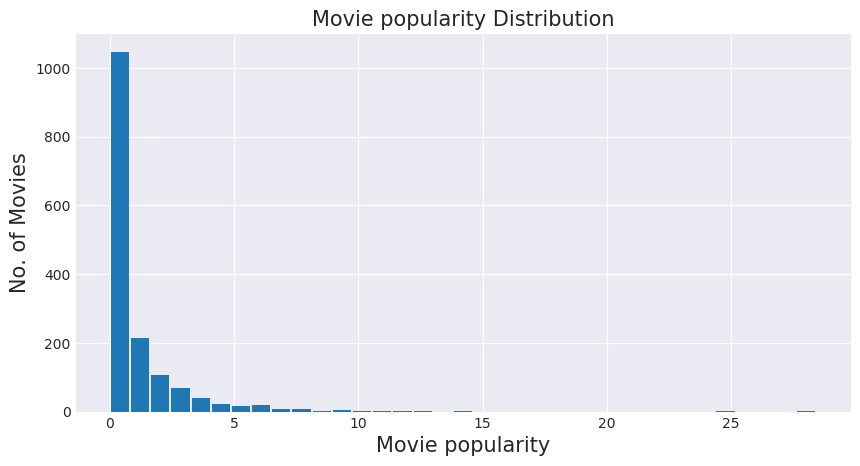

In [52]:
# create histogram to see the distribution of the popularity 
plt.figure(figsize=(10,5), dpi = 100)
sns.set_style('darkgrid')
# x-axis 
plt.xlabel('Movie popularity', fontsize = 15)
# y-axis 
plt.ylabel('No. of Movies', fontsize=15)
# distribution title
plt.title('Movie popularity Distribution', fontsize=15)

# Plot the histogram
plt.hist(high_vote_movie['popularity'], rwidth = 0.9, bins =35)
# Displays the plot
plt.show()

In [53]:
# the average budget of the movies
high_vote_movie['budget_adj'].mean()

38552080.17716758

Based on the above, the average budget for high vote movies is around 38.5 Million dollars ($38,552,080).

In [54]:
# the average revenue of the movies
high_vote_movie['revenue_adj'].mean()

161986833.41000712

Based on the above, the average revenue for high vote movies is around 161 Million dollars. ($161,986,833).

In [56]:
def extract_high_vote_data(column):

    data = high_vote_movie[column].str.cat(sep = '|')
    
    # create pandas series and store the values separately
    data = pd.Series(data.split('|'))
    
    # display value count in descending order
    count = data.value_counts(ascending = False)
    
    return count

High vote average movies casts ??

In [57]:
# get top 10 casts
vote_cast = extract_high_vote_data('cast')
vote_cast.head(15)

Robert De Niro        20
Tom Hanks             18
Samuel L. Jackson     16
Brad Pitt             14
Michael Caine         13
Johnny Depp           12
Al Pacino             12
Leonardo DiCaprio     12
Mark Ruffalo          12
Scarlett Johansson    11
Paul Newman           11
Denzel Washington     11
Harrison Ford         11
Morgan Freeman        10
Ethan Hawke           10
dtype: int64

Surprisingly, there is a swap from this high profit movies listing with the high vote movie listing. Based on the result above Robert DE Niro have the most high vote movies with 20 movies followed by Tom Hankes with 18 movies and have the same rank in high profit movies listing. As for female actress are Scarlett Johansson (11 movies). Seems like there are more high vote movies actors than actress as out of the 15 cast from the above list there are only 1 female.

High vote average movies Director ??

In [58]:
# get top 10 directors
vote_director = extract_high_vote_data('director')
vote_director.head(10)

Martin Scorsese      15
Steven Spielberg     13
Joel Coen            13
Quentin Tarantino    10
Wes Anderson         10
Clint Eastwood        9
David Fincher         8
Christopher Nolan     8
Woody Allen           8
Sidney Lumet          7
dtype: int64

As we see here Martin Scorsese have the largest number of high vote movies with 15 movies followed by Steven Spielberg With 13 movies who have the the largest number of high profit movies too. There is a difference here between high vote movies directors listing and high profit movies directors listing.

High vote average movies production companies ??

In [59]:
# Get top 10 production companies
vote_production_companies = extract_high_vote_data('production_companies')
vote_production_companies.head(10)

Warner Bros.                              94
Universal Pictures                        72
Paramount Pictures                        61
Walt Disney Pictures                      42
Twentieth Century Fox Film Corporation    41
New Line Cinema                           29
Columbia Pictures                         29
Pixar Animation Studios                   29
Metro-Goldwyn-Mayer (MGM)                 27
Miramax Films                             21
dtype: int64

Based on the above result, there is small difference between high vote movies production company listing and high profit movies production company listing. Warner Bros has the largest number of high vote movies with 94 movies followed by Universal Pictures with 72 movies which has the largest number of high profit movies and Paramount Pictures has the same rank in two lists.

High vote average movies genres ??

In [60]:
# Get top 10 genres
vote_genres = extract_high_vote_data('genres')
vote_genres.head(10)

Drama          779
Comedy         385
Documentary    268
Action         231
Thriller       230
Crime          206
Adventure      190
Romance        173
Animation      171
Family         164
dtype: int64

<a id='conclusions'></a>
## Conclusions
My goal of this data analysis is to answer the 2 main questions - (1) kind of properties that are associated with movies with a high profit of at least 100 Million dollars? (2) kind of properties that are associated with movies with a high vote of at least 7.0 from 10? After the above analysis, I can conclude the following:

Properties and attributes of the movies have a profit of at least 100 Million Dollars:

Average popularity of the movie 1.3112 million people.
Average Budget must be around 42 Million Dollars
Average revenue must be around 257 Million Dollars
Year that makes the most profit: 2013.
Month to release the movie: December or June
Actors to cast: Tom Cruise, Tom Hanks, Samuel L. Jackson.
Any one of these should be the director: Steven Spielberg, Robert Zemeckis, Ron Howard.
Popular production companies for high profit movies: Universal Pictures, Warner Bros., Paramount Pictures.
Genre must any of these: Drama, Comedy, Thriller.
For a movie to have a vote of at least 7.0 :

Average popularity of the movie 1.088 million people.
Average Budget must be around 38 Million Dollars.
Average revenue must be around 161 Million Dollars.
Actors to cast: Robert De Niro, Tom Hanks, Samuel L. Jackson, Brad Pitt.
Any one of these should be the director: Martin Scorsese, Steven Spielberg, Joel Coen.
Produce by any of these production companies: Warner Bros., Universal Pictures, Paramount Pictures .
Genre must any of these: Comedy, Drama, Documentary.



By meeting the above criteria, the movie will have a higher probability to be a hit and earn an average revenue of around 371 million dollar and profit of at least 100 million dollars.

But do note that the above analysis was done on the movies from 1960 to 2015 and with a profit of at least 100 million dollar. Also considering that there is a huge number of missing data and noticed that some of the error values for the movies (e.g. $1 for some of the movies).

##Limitations :

1-i have used TMBD Movies dataset for my analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.
2-There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
3-Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed but it is necessary
4- i tried to make the report simple as possible 
5= my goal was doing some analysis to help answering important questions and to extract important statistics

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])